# 911 Calls Exploration (dataset 2020-07-29)

This exploration will analyze the emergency call (911) dataset from [Kaggle](https://www.kaggle.com/mchirico/montcoalert) containing Fire, Traffic, Emergency Medical Services (EMS) incidents for Montgomery County, Pennsylvania.

## Data Set

The latest version available is used for this work: Version 32, 2020-07-29.
New versions are provided multiple times per month.

Data fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Imports

In [1]:
import os
import shutil
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (8, 6)

## Download and Unzip

In [2]:
!kaggle datasets download -d mchirico/montcoalert

# target folder
local_zip = f'{os.getcwd()}\\Data\\montcoalert.zip'

# cut and paste
shutil.move(f'{os.getcwd()}\\montcoalert.zip', local_zip)


  0%|          | 0.00/24.2M [00:00<?, ?B/s]
  4%|4         | 1.00M/24.2M [00:00<00:02, 9.00MB/s]
  8%|8         | 2.00M/24.2M [00:00<00:02, 9.15MB/s]
 17%|#6        | 4.00M/24.2M [00:00<00:02, 10.4MB/s]
 25%|##4       | 6.00M/24.2M [00:00<00:01, 11.5MB/s]
 33%|###3      | 8.00M/24.2M [00:00<00:01, 12.3MB/s]
 41%|####1     | 10.0M/24.2M [00:00<00:01, 13.0MB/s]
 50%|####9     | 12.0M/24.2M [00:00<00:00, 13.6MB/s]
 58%|#####7    | 14.0M/24.2M [00:01<00:00, 13.9MB/s]
 66%|######6   | 16.0M/24.2M [00:01<00:00, 14.3MB/s]
 74%|#######4  | 18.0M/24.2M [00:01<00:00, 14.5MB/s]
 83%|########2 | 20.0M/24.2M [00:01<00:00, 14.6MB/s]
 91%|######### | 22.0M/24.2M [00:01<00:00, 13.9MB/s]
 99%|#########9| 24.0M/24.2M [00:01<00:00, 14.4MB/s]
100%|##########| 24.2M/24.2M [00:01<00:00, 14.1MB/s]


'C:\\Users\\ChristianV700\\Documents\\GitHub\\DataScienceProjects\\Data\\montcoalert.zip'

In [3]:
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(f'{os.getcwd()}\\Data')
zip_ref.close()

In [4]:
# Reading the data into a Pandas Data Frame
df = pd.read_csv(f'{os.getcwd()}\\Data\\911.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [6]:
# Checking the head of the dataframe
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Analysis

Let's check out the top 5 zipcodes for calls.

In [7]:
df['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

The top townships for the calls were as follows:

In [8]:
df['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

For 90k + entries, how many unique call titles did we have? 

In [9]:
df['title'].nunique()

148

In [10]:
print('Oldest date: ',df['timeStamp'].min())
print('Youngest date: ',df['timeStamp'].max())

Oldest date:  2015-12-10 14:39:21
Youngest date:  2020-07-29 15:54:08


## Data Wrangling for Feature Creation

We can extract some generalised features from the columns in our dataset for further analysis. 

In the _title_ column, there's a kind of 'subcategory' or 'reason for call' alloted to each entry (denoted by the text before the colon). 

The timestamp column can be further segregated into Year, Month and Day of Week too. 

Let's start with creating a 'Reason' feature for each call.

In [11]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [12]:
df.tail()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1,Traffic
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1,EMS
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1,EMS
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1,Fire
663521,40.015046,-75.299674,HAVERFORD STATION RD & W MONTGOMERY AVE; LOWER...,19041.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:52:46,LOWER MERION,HAVERFORD STATION RD & W MONTGOMERY AVE,1,Traffic


Now, let's find out the most common reason for 911 calls, according to our dataset.

In [13]:
df['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

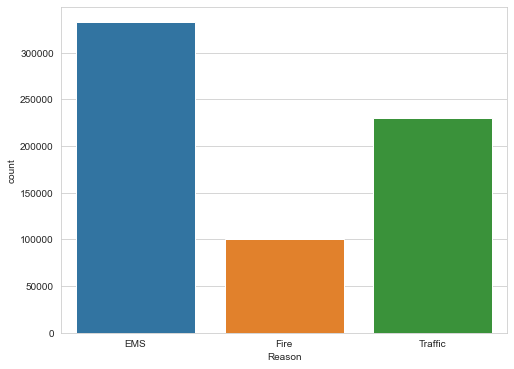

In [14]:
sns.countplot(df['Reason'])

Let's deal with the time information we have. Checking the datatype of the timestamp column.

In [15]:
type(df['timeStamp'][0])

str

As the timestamps are still string types, it'll make our life easier if we convert it to a python DateTime object, so we can extract the year, month, and day information more intuitively. 

In [16]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

For a single DateTime object, we can extract information as follows.

In [17]:
time = df['timeStamp'].iloc[0]

print('Hour:',time.hour)
print('Month:',time.month)
print('Day of Week:',time.dayofweek)

Hour: 17
Month: 12
Day of Week: 3


Now let's create new features for the above pieces of information.

In [18]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [19]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3


The Day of the Week is an integer and it might not be instantly clear which number refers to which Day. We can map that information to a Mon-Sun string.

In [20]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [21]:
df['Day of Week'] = df['Day of Week'].map(dmap)

df.tail(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1,EMS,15,7,Wed
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1,Fire,15,7,Wed
663521,40.015046,-75.299674,HAVERFORD STATION RD & W MONTGOMERY AVE; LOWER...,19041.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:52:46,LOWER MERION,HAVERFORD STATION RD & W MONTGOMERY AVE,1,Traffic,15,7,Wed


Let's combine the newly created features, to check out the most common call reasons based on the day of the week.

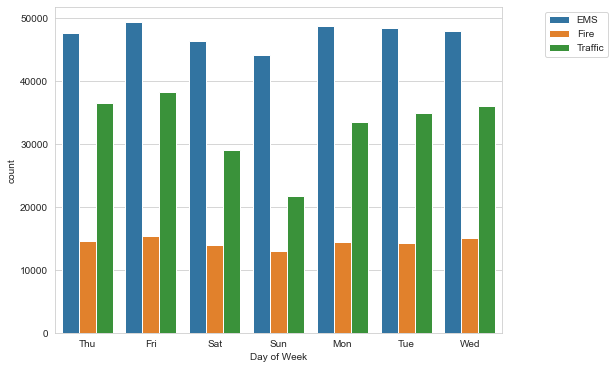

In [22]:
sns.countplot(df['Day of Week'],hue=df['Reason'])

plt.legend(bbox_to_anchor=(1.25,1))

It makes sense for the number of traffic related 911 calls to be the lowest during the weekends, what's also iteresting is that Emergency Service related calls are also low during the weekend.

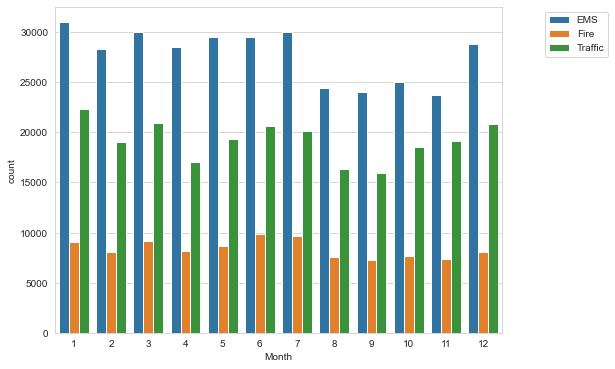

In [23]:
sns.countplot(df['Month'],hue=df['Reason'])

plt.legend(bbox_to_anchor=(1.25,1))

Now, let's check out the relationship between the number of calls and the month.

In [24]:
byMonth = df.groupby(['Month']).count()

Text(0, 0.5, 'Number of Calls')

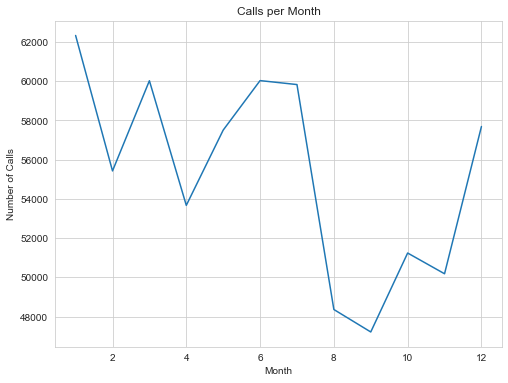

In [25]:
byMonth['e'].plot.line(y='e')
plt.plot()
plt.title('Calls per Month')
plt.ylabel('Number of Calls')

Using seaborn, let's fit the number of calls to a month and see if there's any concrete correlation between the two.

In [26]:
byMonth.reset_index(inplace=True)

Text(-7.324999999999996, 0.5, 'Number of Calls')

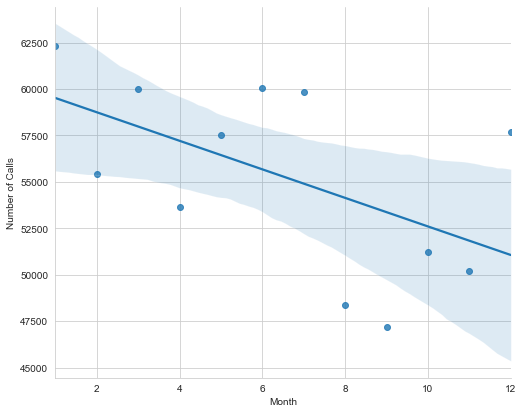

In [27]:
# the lmplot is a convenient interface to fit regression models
seabornplot = sns.lmplot(x='Month',y='e',data=byMonth)
seabornplot.fig.set_figwidth(8)
seabornplot.fig.set_figheight(6)
plt.ylabel('Number of Calls')

So, it does seem that there are fewer emergency calls during the late summer vacation seasons and Fall.

Extract the date from the timestamp, and see behavior in a little more detail.

In [28]:
df['Date']=df['timeStamp'].apply(lambda x: x.date())

In [29]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015-12-10


Grouping and plotting the data: 

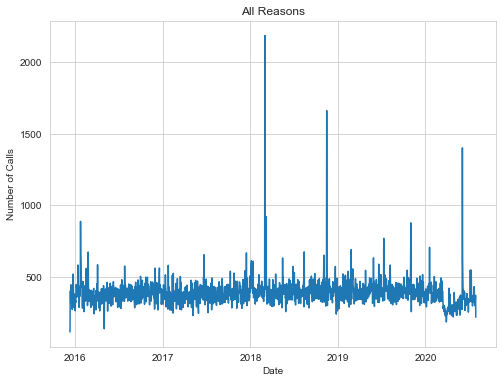

In [30]:
df.groupby(['Date']).count()['e'].plot.line(y='e')
plt.title('All Reasons')
plt.ylabel('Number of Calls')
plt.legend().remove()
#plt.tight_layout()

We can also check out the same plot for each reason separately. Note the dips during the COVID "shelter-in-place" regulation and how it recovers.

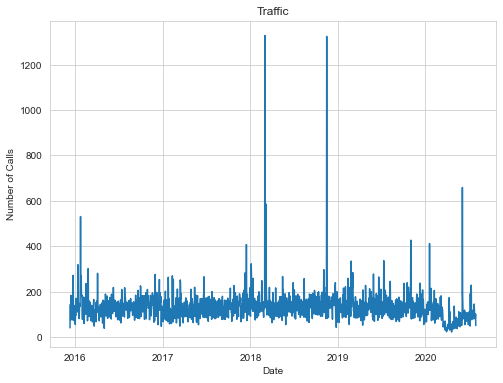

In [31]:
df[df['Reason']=='Traffic'].groupby(['Date']).count().plot.line(y='e')
plt.ylabel('Number of Calls')
plt.title('Traffic')
plt.legend().remove()
#plt.tight_layout()

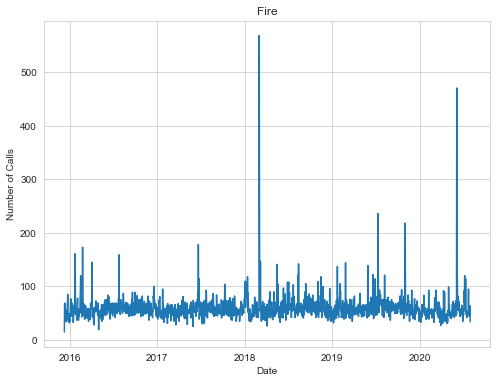

In [32]:
df[df['Reason']=='Fire'].groupby(['Date']).count().plot.line(y='e')
plt.ylabel('Number of Calls')
plt.title('Fire')
plt.legend().remove()
#plt.tight_layout()

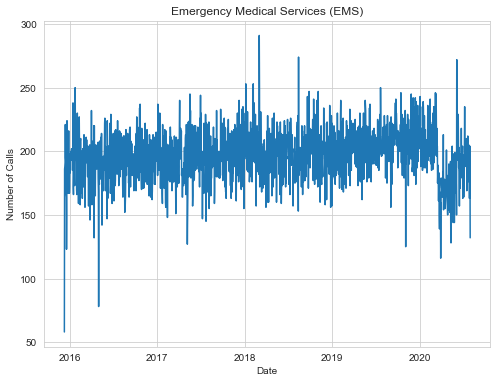

In [33]:
df[df['Reason']=='EMS'].groupby(['Date']).count().plot.line(y='e')
plt.ylabel('Number of Calls')
plt.title('Emergency Medical Services (EMS)')
plt.legend().remove()
#plt.tight_layout()

Let's create a heatmap for the counts of calls on each hour, during a given day of the week.

In [34]:
day_hour = df.pivot_table(values='lat',index='Day of Week',columns='Hour',aggfunc='count')

day_hour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tue,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wed,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


** Now create a HeatMap using this new DataFrame. **

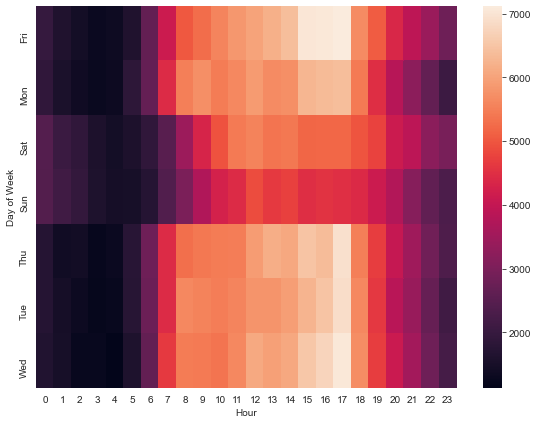

In [35]:
sns.heatmap(day_hour)

plt.tight_layout()

We see that most calls take place around the end of office hours (17:00) on weekdays. 

We can create a clustermap to pair up similar Hours and Days.

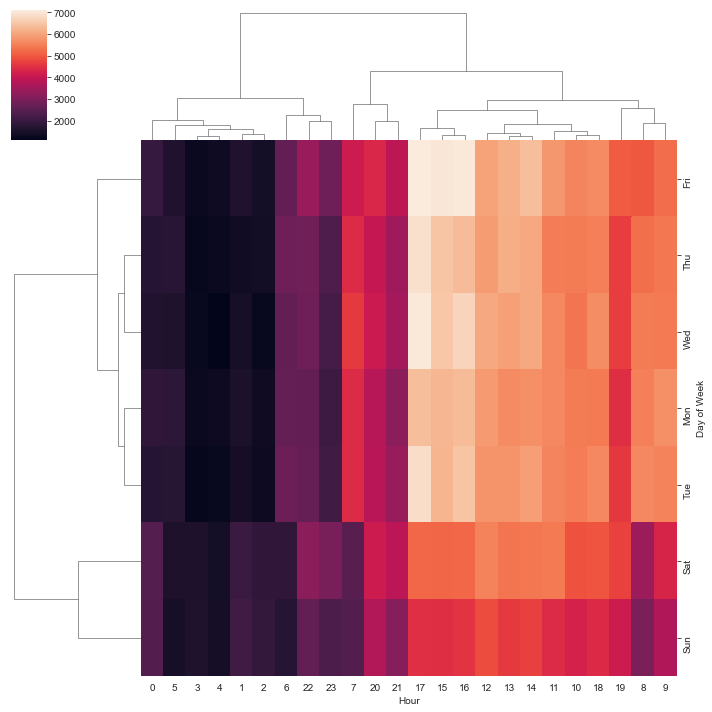

In [36]:
sns.clustermap(day_hour)